In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_raw_data = pd.read_csv('lending_data.csv')

# Review the DataFrame
df_raw_data

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


In [7]:
# Check if any null values in lending data
print(df_raw_data.isnull())

       loan_size  interest_rate  borrower_income  debt_to_income  \
0          False          False            False           False   
1          False          False            False           False   
2          False          False            False           False   
3          False          False            False           False   
4          False          False            False           False   
...          ...            ...              ...             ...   
77531      False          False            False           False   
77532      False          False            False           False   
77533      False          False            False           False   
77534      False          False            False           False   
77535      False          False            False           False   

       num_of_accounts  derogatory_marks  total_debt  loan_status  
0                False             False       False        False  
1                False             False       

array([[<Axes: title={'center': 'loan_size'}>,
        <Axes: title={'center': 'interest_rate'}>,
        <Axes: title={'center': 'borrower_income'}>],
       [<Axes: title={'center': 'debt_to_income'}>,
        <Axes: title={'center': 'num_of_accounts'}>,
        <Axes: title={'center': 'derogatory_marks'}>],
       [<Axes: title={'center': 'total_debt'}>,
        <Axes: title={'center': 'loan_status'}>, <Axes: >]], dtype=object)

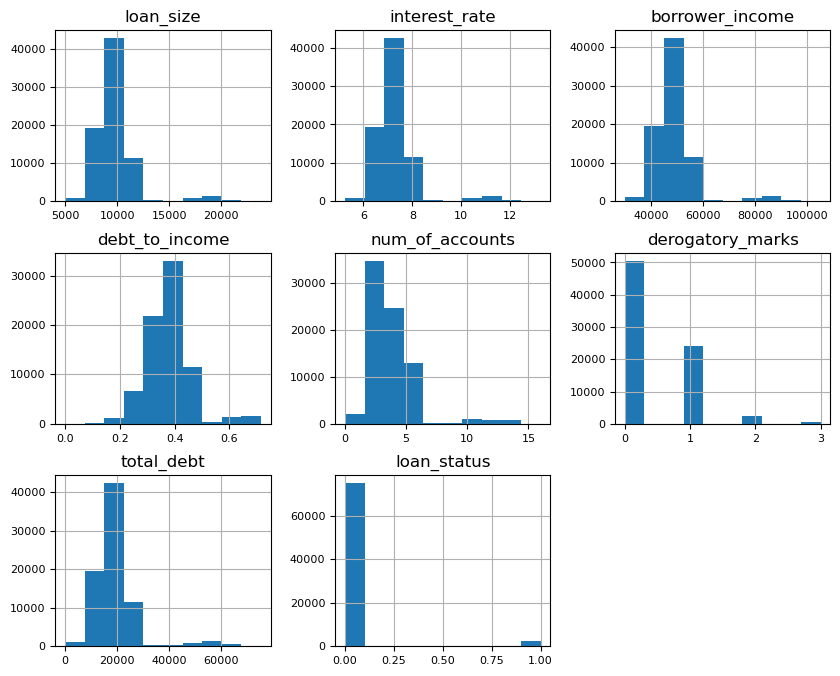

In [9]:
# Explore data
df_raw_data.hist(xlabelsize=8, ylabelsize=8, figsize=(10,8))

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.
#### Note: A value of 0 in the loan_status column means the loan is healty; 1 means the loan has a high risk of defaulting.

In [14]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_raw_data['loan_status']

# Separate the X variable, the features
X = df_raw_data.drop('loan_status', axis=1)

In [15]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [16]:
# Review the X variable DataFrame
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [17]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [18]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [22]:
y_test

60914    0
36843    0
1966     0
70137    0
27237    0
        ..
45639    0
11301    0
51614    0
4598     0
2793     0
Name: loan_status, Length: 19384, dtype: int64

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [31]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)

# Fit the model using training data
lr_model = model.fit(X_train, y_train)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [32]:
# Make a prediction using the testing data
testing_predict = model.predict(X_test)

In [33]:
# Make a prediction using the training data
training_predict = lr_model.predict(X_train)

In [28]:
# Take a look at training and testing data scores
print(f'Training Data Score:{model.score(X_train, y_train)}')
print(f'Testing Data Score:{model.score(X_test, y_test)}')

Training Data Score:0.9921240885954051
Testing Data Score:0.9918489475856377


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [36]:
# Print the balanced_accuracy score of the test data 
balanced_accuracy_score(y_test, testing_predict)

0.9520479254722232

In [35]:
# Generate a confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predict)
test_matrix

array([[18663,   102],
       [   56,   563]], dtype=int64)

In [38]:
# Generate cofusion matrix for the trainng data
train_matrix = confusion_matrix(y_train, training_predict)
train_matrix

array([[55994,   277],
       [  181,  1700]], dtype=int64)

In [40]:
# Print the classification report for testing data
testing_report = classification_report(y_test, testing_predict)
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



In [41]:
# Print the classification report for training data
training_report = classification_report(y_train, training_predict)
print(training_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56271
           1       0.86      0.90      0.88      1881

    accuracy                           0.99     58152
   macro avg       0.93      0.95      0.94     58152
weighted avg       0.99      0.99      0.99     58152



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** WRITE YOUR ANSWER HERE!

In [62]:
# Answer quesiton
print(f'With accuracy score of 0.99, logistic regression model predicts well on both healty and high-risk loans.')

With accuracy score of 0.99, logistic regression model predicts well on both healty and high-risk loans.


---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [13]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

# Fit the original training data to the random_oversampler model
# YOUR CODE HERE!

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# Count the distinct values of the resampled labels data
# YOUR CODE HERE!

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [ ]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

# Fit the model using the resampled training data
# YOUR CODE HERE!

# Make a prediction using the testing data
# YOUR CODE HERE!

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [ ]:
# Print the balanced_accuracy score of the model 
# YOUR CODE HERE!

In [ ]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!

In [ ]:
# Print the classification report for the model
# YOUR CODE HERE!

### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** YOUR ANSWER HERE!